# Matrix product operator

Consider the XYZ model
$$
\begin{equation}
    H=\sum_{j}J_{x}S_{j}^{x}S_{j+1}^{x}+J_{y}S_{j}^{y}S_{j+1}^{y}+J_{z}S_{j}^{z}S_{j+1}^{z}
\end{equation}
$$
on a generic lattice $\Lambda$.



In [5]:
import sympy as sp
import numpy as np
from sympy import pprint, simplify
from fractions import Fraction
sp.init_printing(use_latex=True)
from IPython.display import display

import bisect

[1, 2, 3] MPO dim: 20


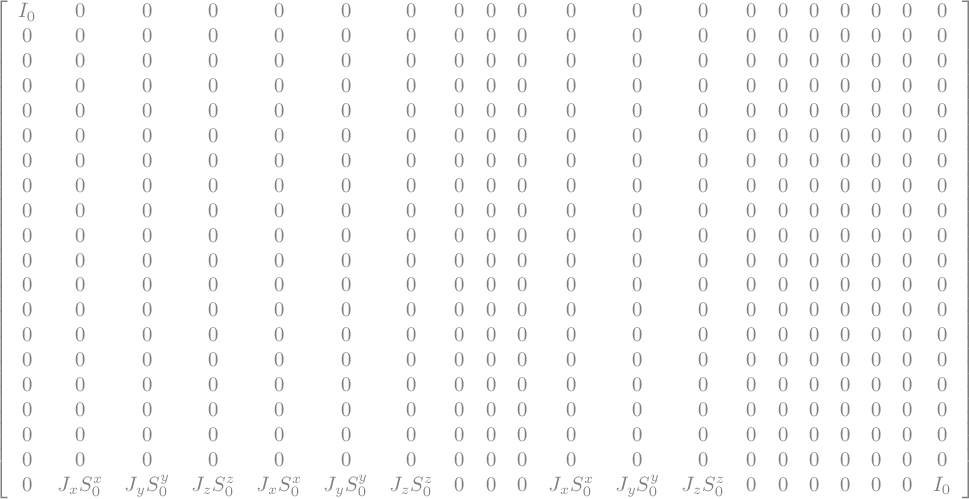

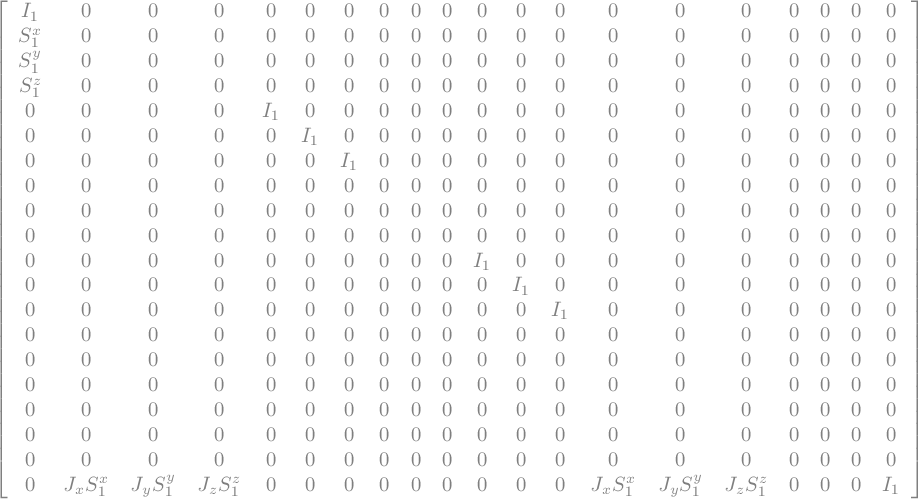

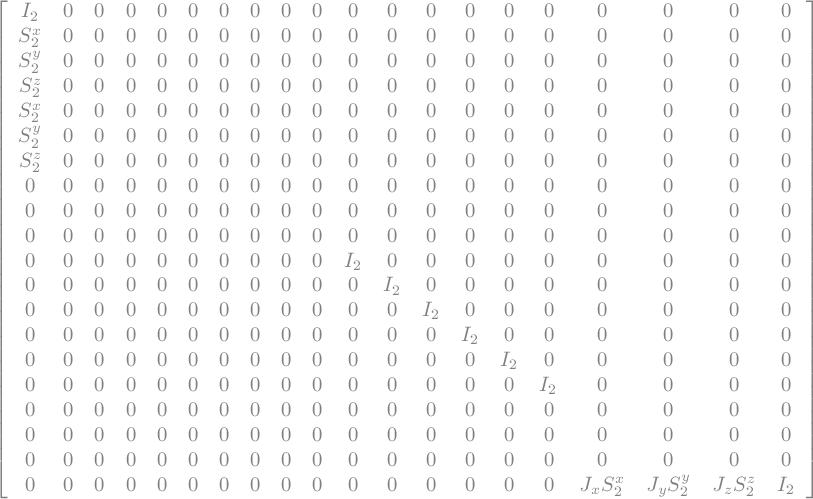

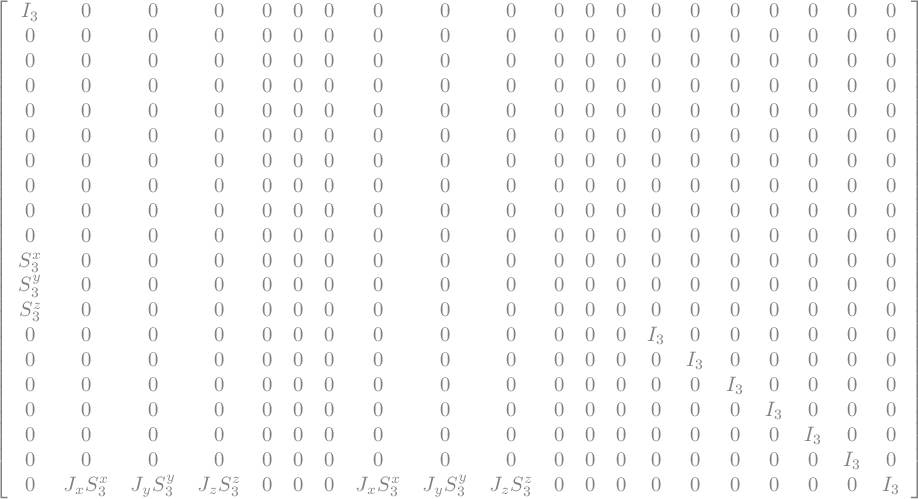

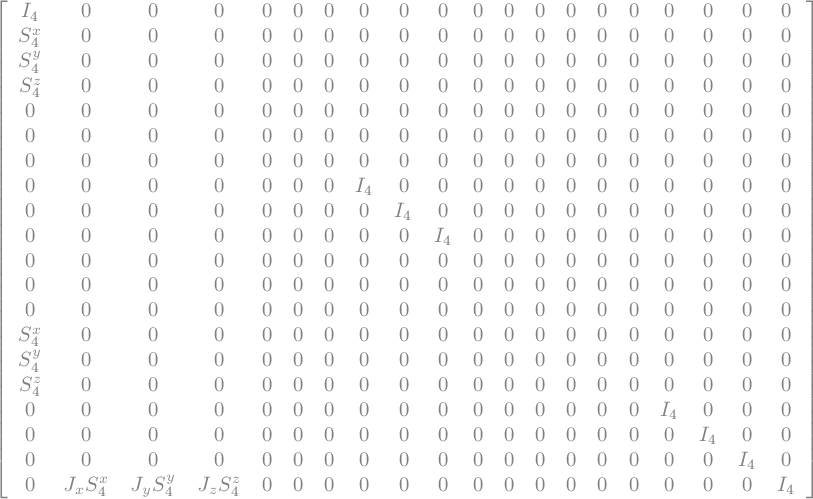

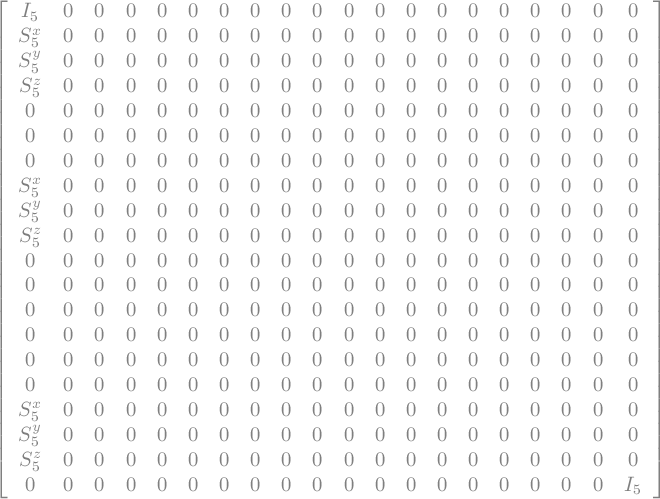

In [10]:
# third neighbor interactions

Jx = sp.Symbol ('J_{x}', real=True)
Jy = sp.Symbol ('J_{y}', real=True)
Jz = sp.Symbol ('J_{z}', real=True)

num_site = 6

# define the local operators
id_list, sx_list, sy_list, sz_list = [], [], [], []
for i in range (num_site):
    id_list.append (sp.Symbol ('I_{%s}' % i, real=True))
    sx_list.append (sp.Symbol ('S_{%s}^{x}' % i, real=True))
    sy_list.append (sp.Symbol ('S_{%s}^{y}' % i, real=True))
    sz_list.append (sp.Symbol ('S_{%s}^{z}' % i, real=True))

# define the topology based on the lattice
# require: 

# OBC
# lattice_top = [[0, 1], [0, 3], [1, 2], [1, 4], [2, 5], [3, 4], [4, 5]]
# PBC
lattice_top = [[0, 1], [0, 3], [1, 2], [1, 4], [2, 0], [2, 5], [3, 4], [4, 5], [5, 3]]

# max number of operators on each link
num_op = 3

# determine the dimension of the MPO frame, each interval represents a block in MPO
dim_mpo = 2
# find how many intervals the lattice has
interval_list = []
for item in (lattice_top):
    interval = np.abs (item[1] - item[0])
    if interval not in interval_list:
        # make the interval_list ordered
        bisect.insort (interval_list, interval)
        dim_mpo += interval*num_op

print (interval_list, 'MPO dim:', dim_mpo)

# the empty MPO list
mpo_list = []
for i in range (num_site):
    temp_mpo = sp.zeros (dim_mpo, dim_mpo)
    # place the trivial identity operators at the corner in the first place
    temp_mpo[0, 0], temp_mpo[dim_mpo-1, dim_mpo-1] = id_list[i], id_list[i]
    mpo_list.append (temp_mpo)

# count the cycle in each block
counter = np.zeros (len (interval_list), dtype=int)

for item in lattice_top:
    [i, j] = np.sort (item)
    interval = j-i
    # postition to place the first operator
    pos = 1
    for k in interval_list:
        if k < interval:
            pos += k*num_op
    # print (item, pos)
    idx = bisect.bisect_left (interval_list, interval)
    pos += counter[idx]*num_op
    counter[idx] = (counter[idx]+1) % interval
    # place j operator
    mpo_list[j][pos+0, 0] = sx_list[j]
    mpo_list[j][pos+1, 0] = sy_list[j]
    mpo_list[j][pos+2, 0] = sz_list[j]
    # place i operator
    mpo_list[i][dim_mpo-1, pos+0] = Jx*sx_list[i]
    mpo_list[i][dim_mpo-1, pos+1] = Jy*sy_list[i]
    mpo_list[i][dim_mpo-1, pos+2] = Jz*sz_list[i]
    # insert the identity operators
    for k in range (interval-1):
        mpo_list[j-k-1][pos+0, pos+0] = id_list[j-k-1]
        mpo_list[j-k-1][pos+1, pos+1] = id_list[j-k-1]
        mpo_list[j-k-1][pos+2, pos+2] = id_list[j-k-1]

for i in range (num_site):
    display (i, mpo_list[i])

res = mpo_list[0]
for i in range (1, num_site):
    res *= mpo_list[i]

left_vec = sp.zeros (1, dim_mpo)
left_vec[0, dim_mpo-1] = 1
right_vec = sp.zeros (dim_mpo, 1)
right_vec[0, 0] = 1

display (left_vec * res * right_vec)